UNSUPERVISED LEARNING



EDSA Movie Recommendation Wilderness Flex your Unsupervised Learning skills to generate movie recommendations from the wilderness of data available!
algorithms can help viewers find great titles from tens of thousands of options.

EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Collaborative filtering is a recommendation system that creates a prediction based on a user’s previous behaviors.
Collaborative filtering (CF) and its modifications is one of the most commonly used recommendation algorithms.

To understand the recommender system better, it is a must to know that there are three approaches to it being:

Content-based filtering, Collaborative filtering, Hybrid model

In [1]:

!pip install wordcloud
!pip install regex
!pip install scikit-surprise
!pip install plotly
!pip install catboost
!pip install comet_ml

     |████████████████████████████████| 11.8 MB 5.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623234 sha256=80eb056b4675ef9ab313483c394a8d2ffa5c2c1a7fdb2fdcb5e0e2cb41c2e432
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise
     |████████████████████████████████| 76.1 MB 1.1 MB/s 
     |████████████████████████████████| 315 kB 4.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 548 kB 72.0 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=3cf8f750db393e72cf1ea7c15e9fa233dcc007bc568a95e3392e371cc7c9a46f
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="jqo20ptaA2zzIEpvXms0ZcjVz",
    project_name="Recommender Systems PREDICT",
    workspace="skchanny",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/skchanny/recommender-systems-predict/129e1233319e42b48c8e305d652e02c0



In [2]:
# Packages for data stuctures and  analysis
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy as sp


# Packages used during sorting procedures
import operator
import heapq

import os
import csv
from csv import reader

# Packages for visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


# Packages for preprocessing and entitiy Featurization
import re
import surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.manifold import TSNE
from time import sleep

# Packages for training models
from surprise import SVD
from surprise import SVDpp
from time import time
from surprise import BaselineOnly
from surprise import CoClustering
from surprise import NMF
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise import KNNBaseline
from surprise import KNNWithZScore
from surprise import NormalPredictor
from surprise import SlopeOne 

import gc


# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

# Packages for evaluating Similarity computations and  model accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from surprise import accuracy
from surprise.accuracy import rmse
from sklearn.metrics import mean_squared_error
import time

# Packages for saving models
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [5]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [6]:
%ls

edsa-movie-recommendation-wilderness/  sample_submission.csv
genome_scores.csv                      sample_submission.csv.zip
genome_scores.csv.zip                  tags.csv
genome_tags.csv                        tags.csv.zip
imdb_data.csv                          Team11.csv
imdb_data.csv.zip                      team12_pkl.pkl
kaggle.json                            test.csv
links.csv                              test.csv.zip
links.csv.zip                          train.csv
movies.csv                             train.csv.zip
movies.csv.zip


In [7]:
# loading training dataset
train = pd.read_csv('train.csv')
# loading testing dataset
test = pd.read_csv('test.csv')

# loading other Dataset
gen_scores = pd.read_csv('genome_scores.csv')
gen_tgs = pd.read_csv('genome_tags.csv')
imd = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
mvs = pd.read_csv('movies.csv')
tgs = pd.read_csv('tags.csv')

# loading Submission file
ss = pd.read_csv('sample_submission.csv')

Exploratory Data Analysis

In [ ]:
imd.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
imd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
imd.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

The IMdb has 6 columns and 5 columns that  have  null values


 Movie Dataframe Overview

In [ ]:
mvs.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
mvs.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

The movie dataframe has 3 columns and no missings value

Genome Tags Dataframe Overview

In [ ]:
gen_tgs.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
gen_tgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
gen_tgs.isnull().sum()

tagId    0
tag      0
dtype: int64

Genome_Tags has 2 columns and no missing values

Genome Scores Dataframe Overview

In [ ]:
gen_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
gen_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [ ]:
gen_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

Genome Scores has 3 columns and no missing data

Tags Dataframe Overview

In [ ]:
tgs.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
tgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [ ]:
tgs.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Tags column has 4 columns with mising values at only the tags column

Link Dataframe Overview

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

Links dataframe has 3 culumns and missing values on the tmdID column

Train Dataframe Overview

In [ ]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

train dataframe has no missing values with the 4 columns 

# Data Visualisation

Popular Movie Genre Plot

In [8]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(mvs[['movieId', 'genres']],columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

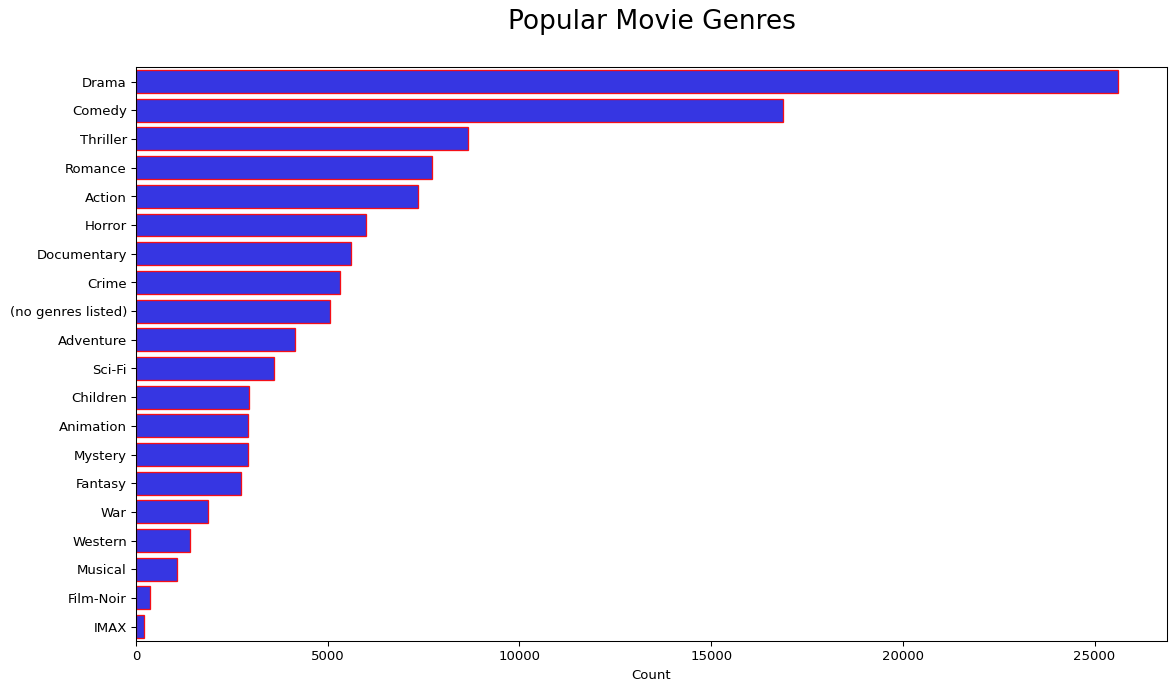

In [9]:
# Plot the genres from most common to 90 common
plot = plt.figure(figsize=(14, 8), dpi =95)
plt.title('Popular Movie Genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,order=movies_genres['genres']
              .value_counts(ascending=False).index, color='b', ec= 'red', alpha=0.9)
plt.ylabel('')
plt.xlabel('Count')
plt.show()

Popular Actors Plot

In [10]:


movies_actor = pd.DataFrame(imd[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the title_cast allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Sececting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)



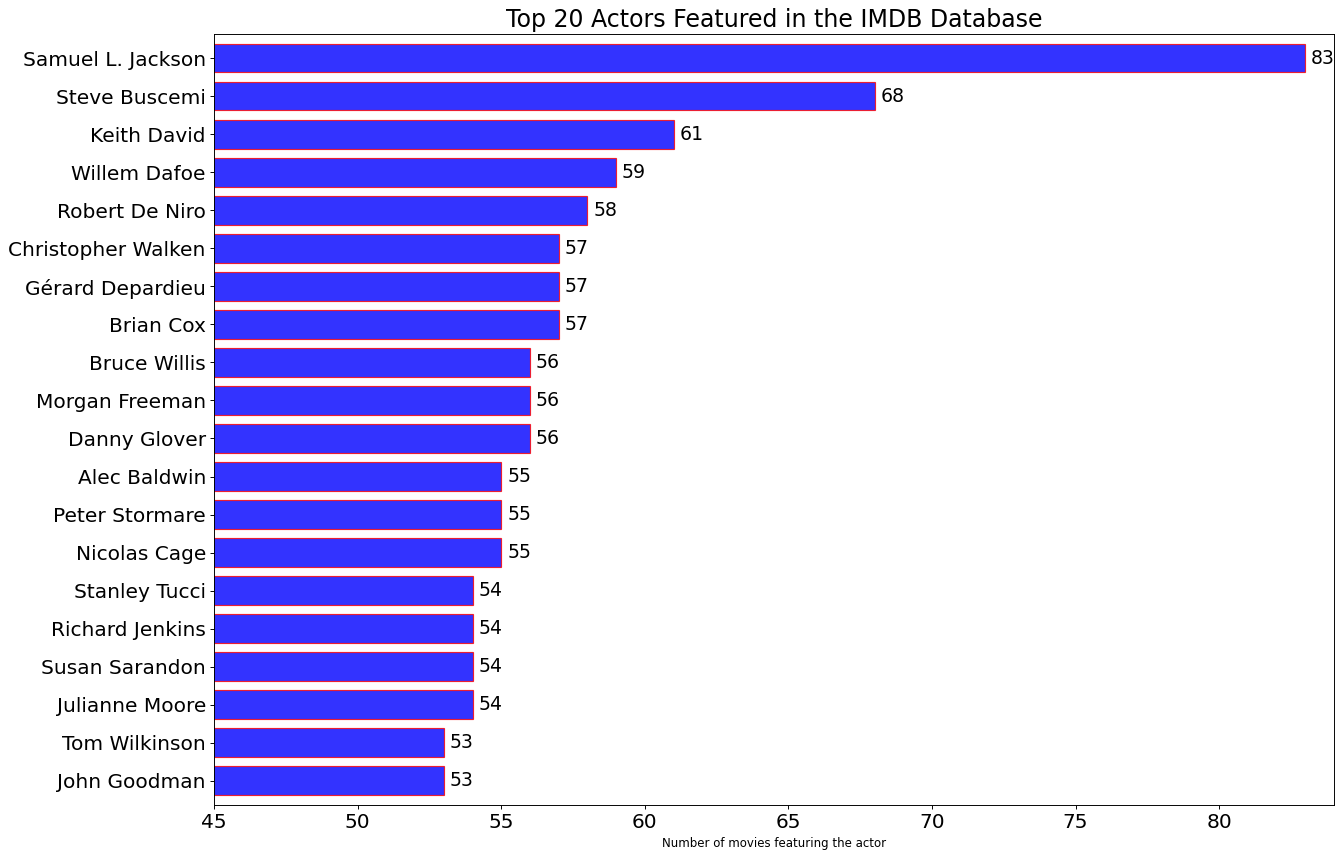

In [11]:
y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='b', fontsize=17,
                                           edgecolor='red', xlim=[45,84], width=.75, alpha=0.8)
ax.set_title('Top 20 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    
    label = "{}".format(x_value)
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),fontsize=16,
                 textcoords="offset points",va='center',ha=ha)            
                                 
       

 Popular Movie directors

In [12]:


## grouping the movies by the director and counting the total number of movies per director
movies_director = pd.DataFrame(imd[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director .head(20)
movies_director =movies_director.sort_values(by='count',ascending=True)



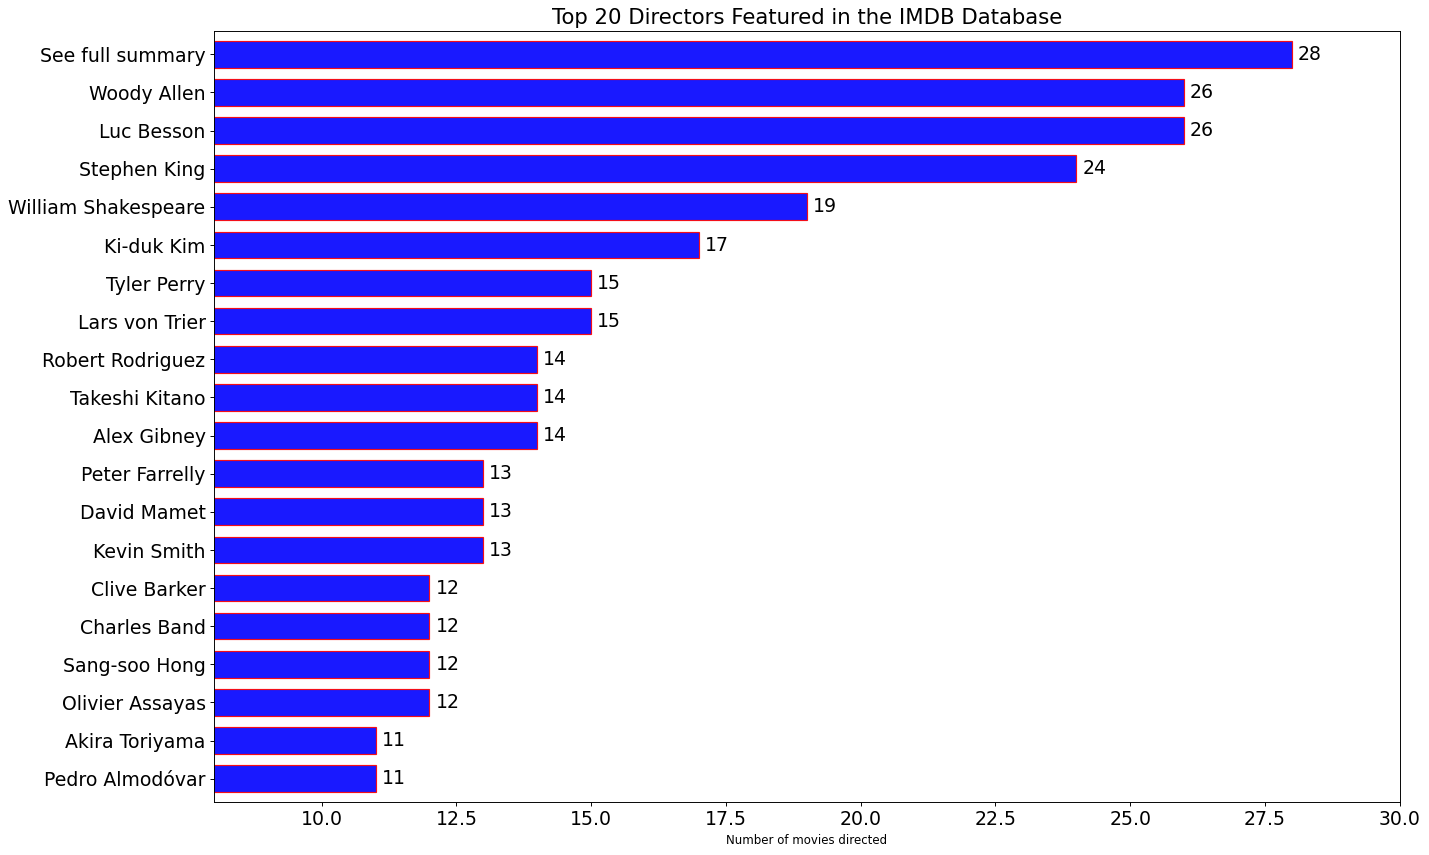

In [13]:
y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='b', edgecolor='red', 
                                   width=.7, fontsize=16, xlim=[8,30], alpha=0.9)
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points"
                 ,va='center',ha=ha, fontsize=16) 

Popular Play Plots

In [14]:
movies_plot = pd.DataFrame(imd[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split play plot seperated by "|" and create a list containing the play plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(20)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

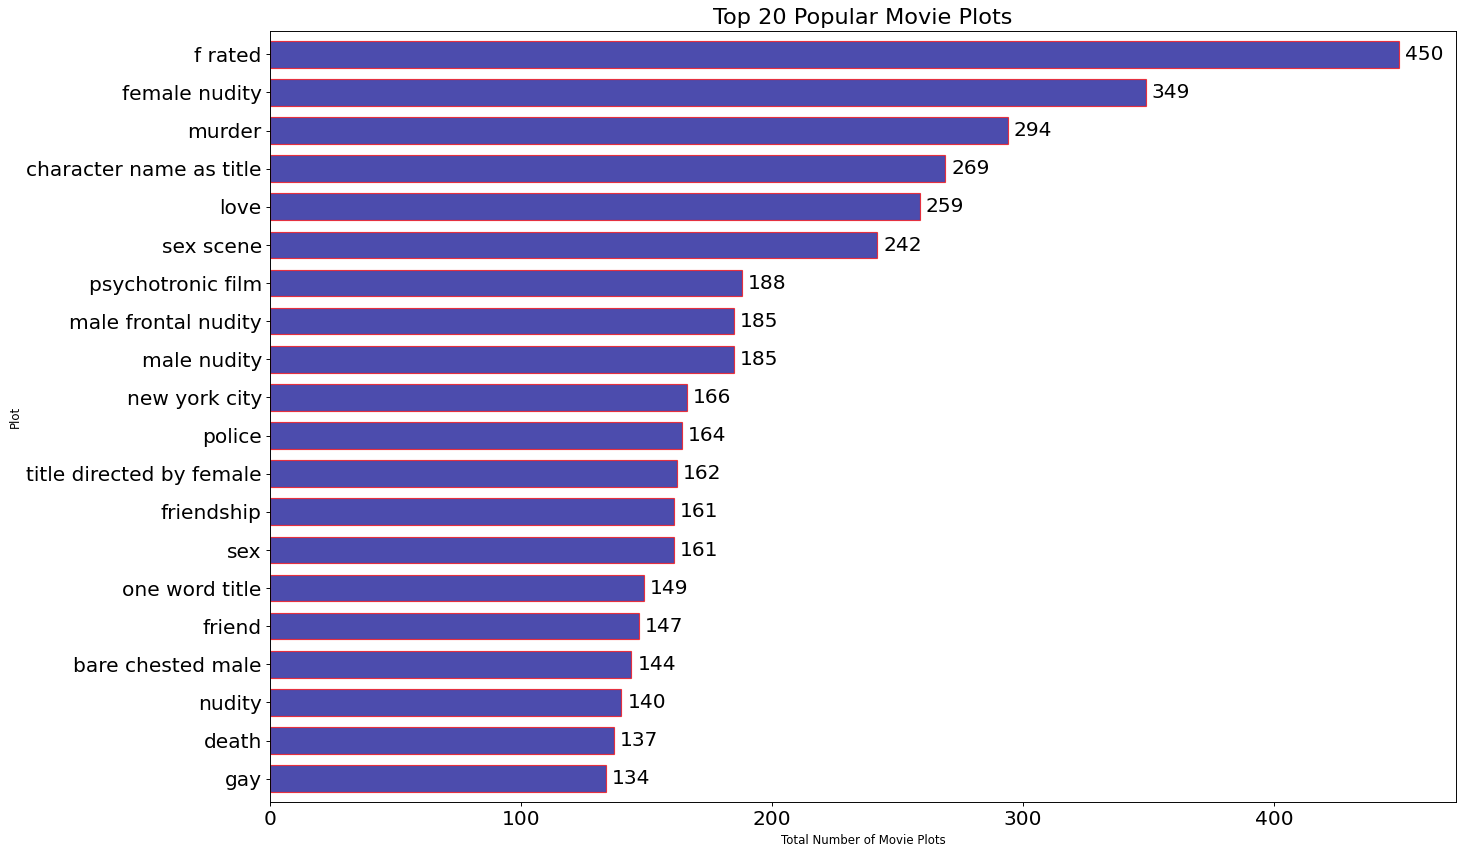

In [15]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='darkblue', fontsize=17,
                                           edgecolor='r', width=.7, alpha=0.7)
ax.set_title('Top 20 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        
        space *= -1

        ha = 'right'

    
    label = "{}".format(x_value)
    
     # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),
                 textcoords="offset points",va='center',ha=ha, fontsize=17) 

 Number of Movies Produced Annually

In [16]:
# Create dataframe containing only the movieId and genres
movies_year = pd.DataFrame(mvs[['movieId', 'title']],columns=['movieId', 'title'])

movies_year= movies_year[movies_year['title'].notnull()]
# Split the year from title
movies_year.title = movies_year.title.apply(lambda x: x[-5:-1])

movies_year = movies_year.groupby(['title'])['movieId'].count().reset_index(name="count")
movies_year =movies_year[movies_year['count'] > 500]
movies_year =movies_year.sort_values(by='count',ascending=True)

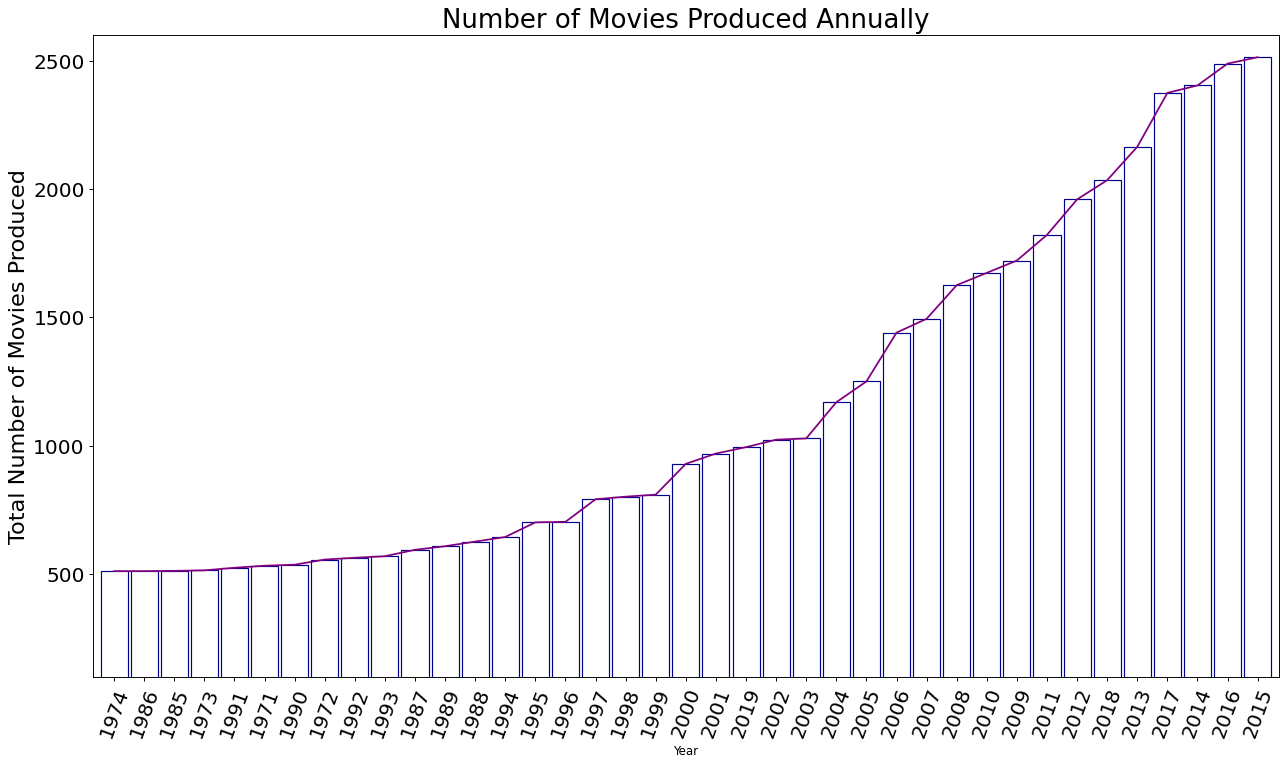

In [17]:


y_labels =movies_year['count']

# Plot the figure.
fig,ax = plt.subplots(figsize=(18, 10), dpi = 85)

movies_year[['count', 'title']].plot(x='title',kind='bar', color='white', fontsize=17, ylim=[100, 2600],
                                           width=.9, ax=ax, legend=False, edgecolor='darkblue')
                                     
movies_year.plot(x='title', kind = 'line', ax=ax, color='purple', legend=False)
                                     
ax.set_title('Number of Movies Produced Annually', fontsize=22)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Movies Produced', fontsize=19)
                                     
plt.xticks(rotation=70)
plt.show()



 Movie tags

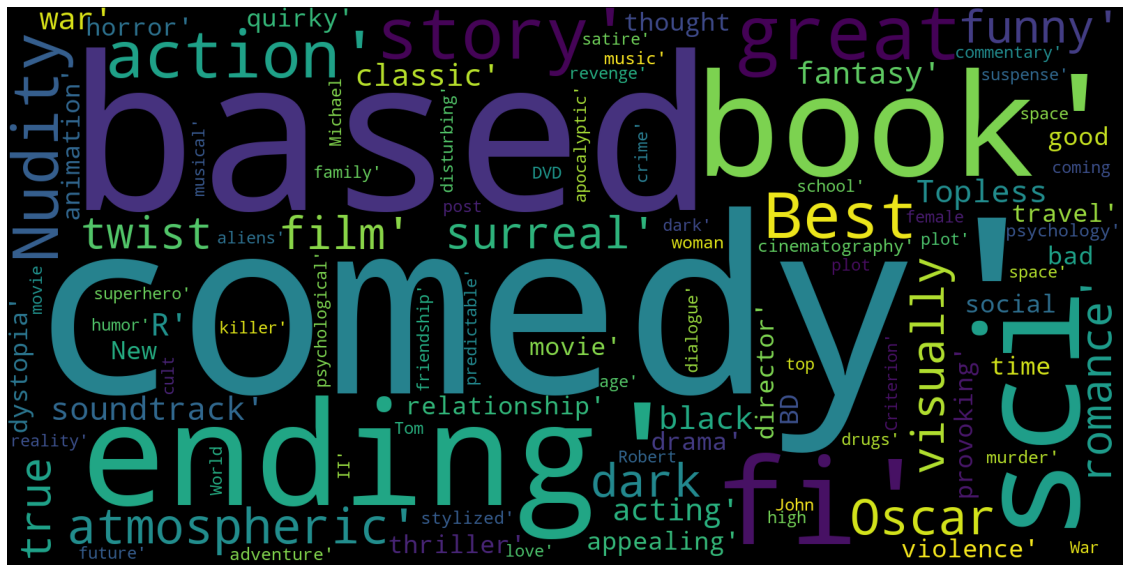

In [19]:
tags_2 =str(list(tgs['tag']))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , width = 1600 , height = 800,
               collocations=False).generate(tags_2)
plt.axis("off")
plt.imshow(wc)

 Movie's Annual Budget

In [21]:


movies_ =imd.sort_values(by='budget',ascending=False)
print(movies_.budget.unique())


['ZAR10,000,000' 'VEB4,273,248' 'UAH10,000' ... '$1,000' '$0' nan]




The bugdet feature has different currency.In this notebook we will consider US dollars $ ,because most movies are in \$


In [23]:


merged_inner = pd.merge(left=mvs, right=imd, left_on='movieId', right_on='movieId')




In [24]:
movies_budget = pd.DataFrame(merged_inner[['movieId', 'title','budget']],columns=['movieId', 'title','budget'])

movies_budget= movies_budget[movies_budget['title'].notnull()]

movies_budget['budget'].replace('', np.nan, inplace=True)
movies_budget.dropna(subset=['budget'], inplace=True)

# Split title seperated by "|" and create a list containing the title allocated to each movie
movies_budget.title = movies_budget.title.apply(lambda x: int(re.findall(r"\d\d\d\d",x).pop(0)))
movies_budget.budget = movies_budget.budget.apply(lambda x: int(re.sub("[^0-9]", "", x)) if str(x)[:1] =='$' else None)
movies_budget = movies_budget[movies_budget['budget'].notnull()]



The list of years and the box and whisker shows that there was a movie released in the year 1000 , this cannot be true.The first basic movie was made in 1888. Also the data has movies made beyod 2021 (such as a movie made in 3000) this values are cearly outliers.


In [25]:
print('list of movie\'s year of release :', list(pd.unique(movies_budget['title'])))

list of movie's year of release : [1995, 1994, 1996, 1992, 1993, 1991, 1990, 1997, 1600, 1998, 2000, 1999, 1900, 2001, 3000, 1989, 2002, 1956, 2003, 1000, 2004, 1983, 1492, 1984, 1985, 2046, 2005, 2006, 2009, 2007, 2008, 1408, 1976, 2012, 2010, 1974, 2011, 2016, 1911, 2013, 1968, 1942, 2014, 2050, 1453, 2015, 1988, 1981]


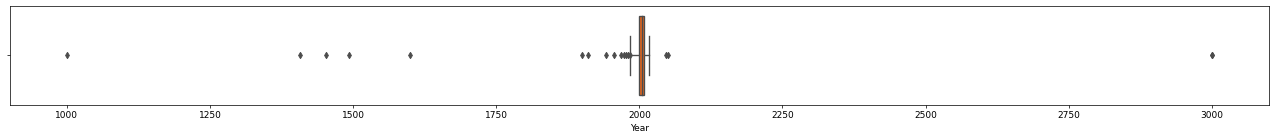

In [26]:
fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x='title', data=movies_budget, palette='hot')
ax.set_xlabel('Year')
plt.show()



We then select movies that are made from 1888 up until the current year 2021


In [27]:


movies_budget =movies_budget[movies_budget['title'] > 1888]
movies_budget =movies_budget[movies_budget['title'] <= 2021]



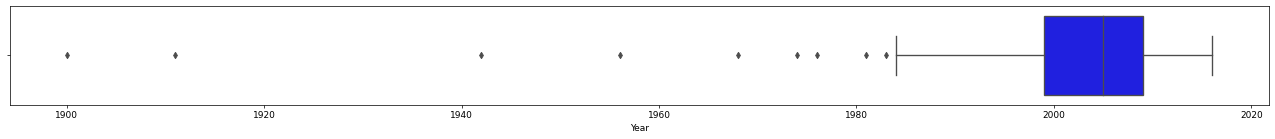

In [28]:
fig,ax = plt.subplots(figsize=(25, 2), dpi=65)
sns.boxplot(x = 'title', data = movies_budget, color='b')
ax.set_xlabel('Year')
plt.show()



The above box and whisker is skewed to the right,this is an indication that more movies where released from the late 90s.This is because of technogyical advances and more investment/budget to the production of movies.


In [29]:
movies_budget =movies_budget[movies_budget['title'] > 1995]
movies_budget =movies_budget[movies_budget['title'] <= 2012]
Total_movie_budget = movies_budget.groupby("title")["budget"].sum().reset_index(name="Sum of movie budget")
Total_movie_budget

,title,Sum of movie budget
0,1996,4.359255e+09
1,1997,5.592129e+09
2,1998,5.629174e+09
3,1999,7.113912e+09
4,2000,7.019107e+09
5,2001,6.981505e+09
6,2002,7.215973e+09
7,2003,6.989922e+09
8,2004,7.725236e+09
9,2005,7.908149e+09


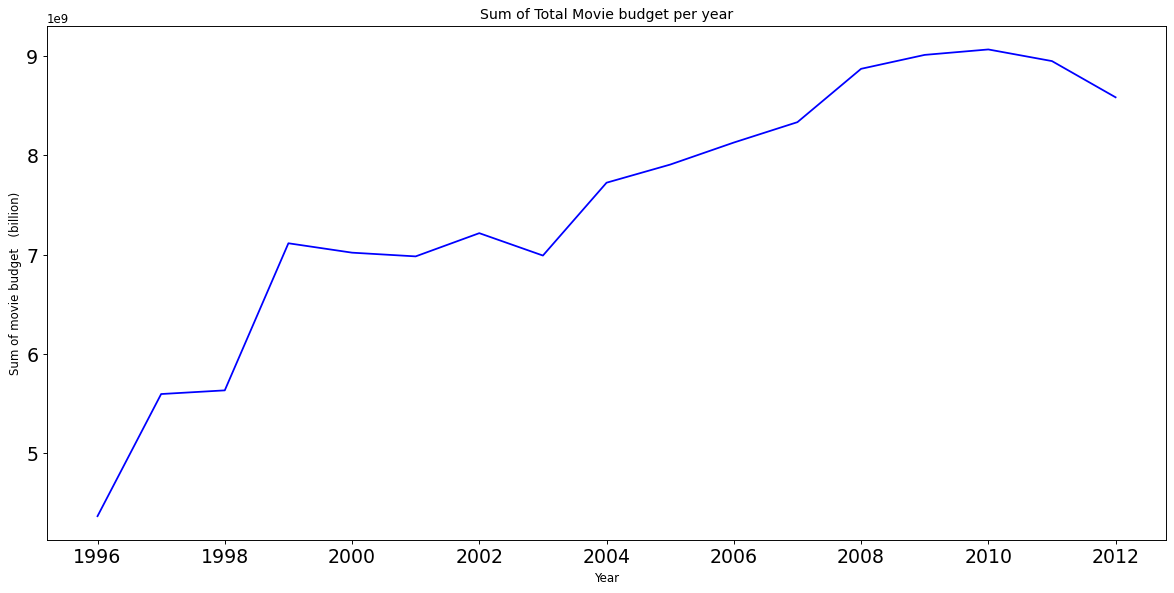

In [30]:


fig,ax = plt.subplots(figsize=(17, 8), dpi=85)

Total_movie_budget.plot.line(x='title',y='Sum of movie budget', ax=ax, color='blue', 
                             legend=False, fontsize=16)
ax.set_title('Sum of Total Movie budget per year')
ax.set_xlabel('Year')
ax.set_ylabel('Sum of movie budget   (billion)')

plt.show()



 User Movie rating plots

In [32]:
train = train.copy()
merged_train = pd.merge(left=mvs, right=train, left_on='movieId', right_on='movieId')
merged_train.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155


In [33]:


merged_train.rating = merged_train.rating.apply(lambda x: int(x))
Hi_rating_df =merged_train[merged_train['rating']==5]

Lo_rating_df =merged_train[merged_train['rating']==0]

Hi_rating_list =str(list(Hi_rating_df['title']))
Lo_rating_list =str(list(Lo_rating_df['title']))




Movies that obtained the highest rating</h2>

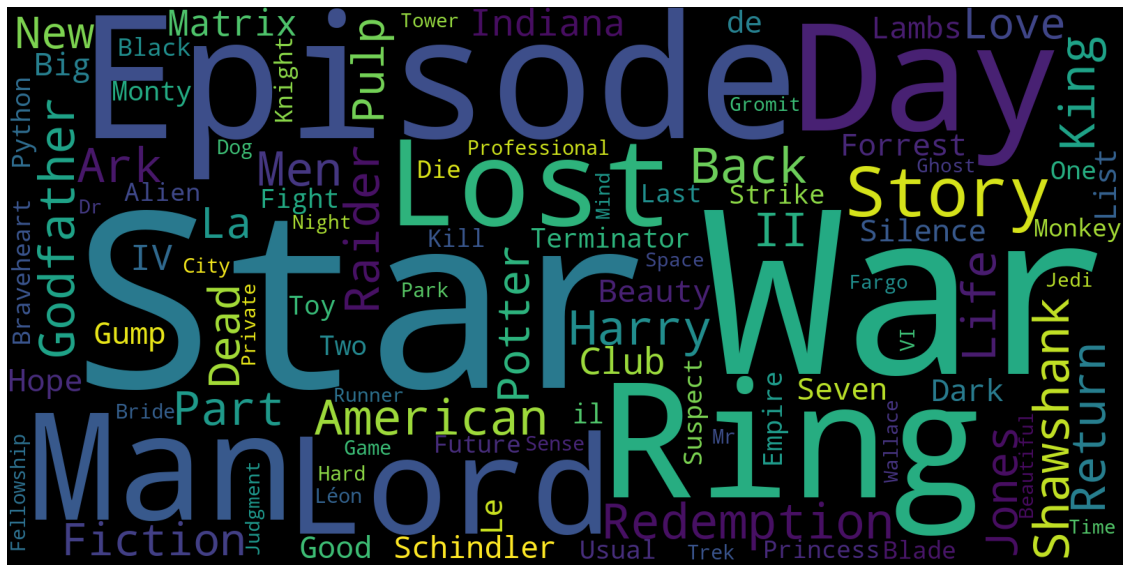

In [34]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Hi_rating_list)
plt.axis("off")
plt.imshow(wc)

Movies that obtained the Lowest rating</h2>

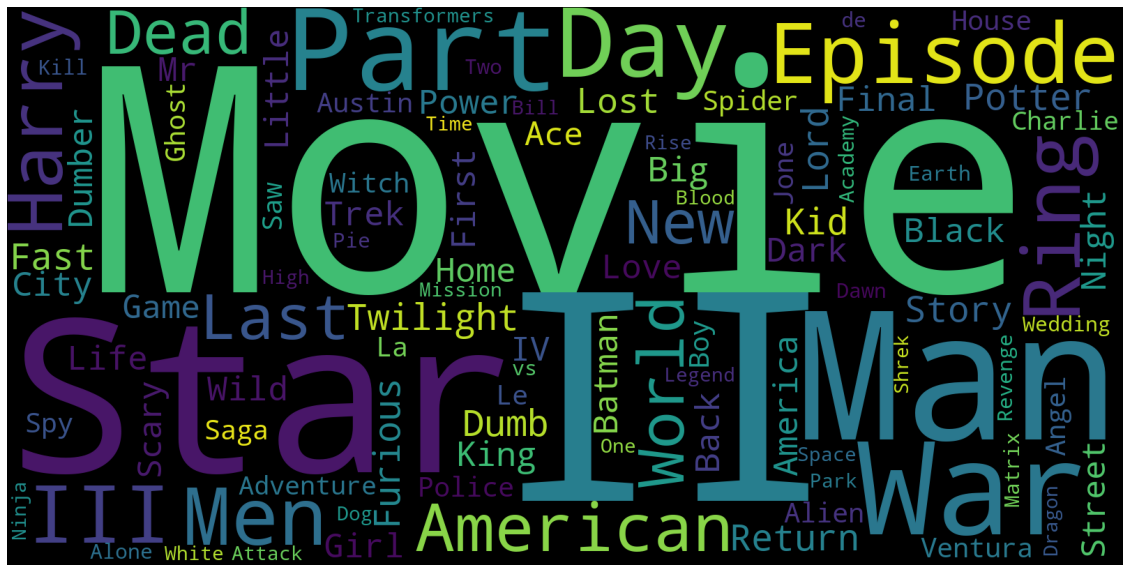

In [35]:
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = "black", max_words = 100 , 
               width = 1600 , height = 800,collocations=False).generate(Lo_rating_list)
plt.axis("off")
plt.imshow(wc)



Some movies such as the star wars movie, appears in the two word plot.This means its possible for a movie to recieve the highest and the lowest rating from different users.


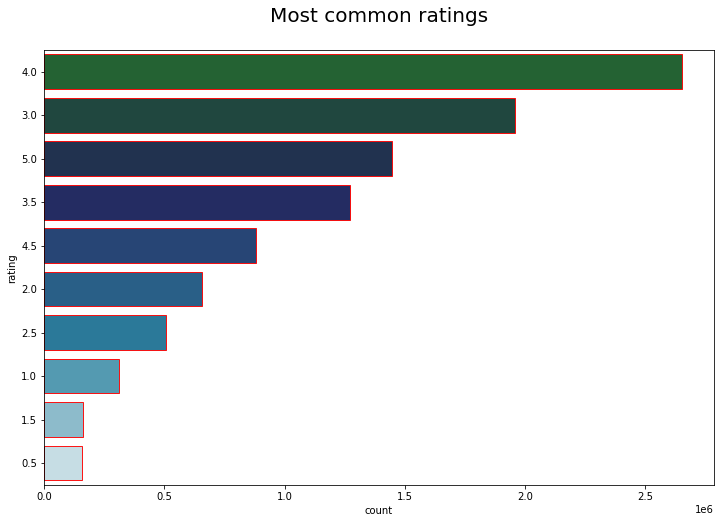

In [36]:
# Plot the ratings from most common to least common
ratings = train['rating'].value_counts(ascending=False).index.tolist()

plot = plt.figure(figsize=(12, 8))
plt.title('Most common ratings\n', fontsize=20)
sns.countplot(y="rating", data=train,
              order=ratings,
              palette='ocean', ec='r', alpha = 0.9)
plt.show()



Here we can see the distribution of the ratings. There seems to be quite a few movies with a prefect rating. Movies with a perfect rating could be a result of it only being rated by a very small amount of people or even just once.


# Data preprocessing

In [ ]:


df_train = train.copy()

"""Counting the number of times a movie has recieved an rating"""
rating_count = df_train.groupby('movieId')['rating'].count().reset_index()
rating_count.rename(columns={'rating': 'movie_rating_count'}, inplace=True)
df_train = df_train.merge(rating_count, on='movieId')

"""Counting the number of times a user has left an rating"""
user_count = df_train.groupby('userId')['rating'].count().reset_index()
user_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)
df_train = df_train.merge(user_count, on='userId')

"""Droping all movies/users which are below a threshhold"""
mrc = 20
urc = 5
df_train = df_train[df_train['movie_rating_count'] > mrc]
df_train = df_train[df_train['user_rating_count'] > urc]
display(df_train.head(3))
print(df_train.shape)
df_train.drop(['movie_rating_count', 'user_rating_count'], 1, inplace=True)

display(df_train.head(3))
print(df_train.shape)



,userId,movieId,rating,timestamp,movie_rating_count,user_rating_count
0,5163,57669,4.0,1518349992,4253,22
1,5163,2671,1.0,1545511636,5698,22
2,5163,1247,4.5,1434310106,7569,22


(9848791, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,5163,2671,1.0,1545511636
2,5163,1247,4.5,1434310106


(9848791, 4)


In [ ]:
def create_features(df, column, features):
    """Creates features from a column of lists where the list items will be the features."""

    features_df = pd.DataFrame(columns=features)
    all_features = pd.concat([df, features_df], axis=1)

    for i, row in all_features.iterrows():
        for feature in features:
            if feature in getattr(row, column):
                all_features[feature].iloc[i] = 1
    all_features = all_features.drop(column, axis=1)

    return all_features

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:

cast = pd.DataFrame(imd[['movieId', 'title_cast']],
                    columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))
cast_movie = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                          columns=['movieId', 'title_cast'])
mostc_cast = cast_movie['title_cast'].value_counts(
    ascending=False).index.tolist()[:16]

cast_encode = create_features(cast, 'title_cast', mostc_cast[1:])
cast_encode.head(4)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,movieId,Samuel L. Jackson,Steve Buscemi,Keith David,Willem Dafoe,Robert De Niro,Brian Cox,Christopher Walken,Gérard Depardieu,Bruce Willis,Danny Glover,Morgan Freeman,Peter Stormare,Alec Baldwin,Nicolas Cage,Susan Sarandon
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gc.collect()
del rating_count, user_count, cast, cast_movie
sleep(2)

 # Content-based Recommendation

In content-based recommendation we'll find similaries bewteen the movies and can reccomend movies based on the level of similarity it shares with the given movie or movie list.

In [ ]:
movies_imdb = pd.merge(mvs,imd, on='movieId', how='left').fillna(0)

In [ ]:
movies_imdb.head(2)
print(movies_imdb.shape)

(62423, 9)


Here we have genres, cast, director and plot keywords which we will use as our 'content'.

In [ ]:
def join_cols(col1, col2, col3):
    """ return the content of individual columns as one """
    temp = []
    for i in range(len(col1)):
        temp.append(str(col1.iloc[i]) + '|' + str(col2.iloc[i]) +
                    '|' + str(col3.iloc[i]))
    return temp

In [ ]:


movies_imdb['joined'] = join_cols(
    movies_imdb.genres, movies_imdb.title_cast, movies_imdb.director)



In [ ]:


# droping the merged columns and columns we don't need
movies_imdb.drop(['genres', 'title_cast', 'director',
                  'plot_keywords', 'budget', 'runtime', 'plot_keywords'], 1, inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:


# limiting
movies_imdb = movies_imdb[:20000]



In [ ]:


# this will be use as a custom tokenizer
def pipe_split(string):
    """ if string has a '|' split on it, if not just pass """
    if '|' in string:
        return string.split('|')
    else:
        return string



In [ ]:


# matrix's of word frequency scores
tf_vec = TfidfVectorizer(min_df=10, stop_words='english',
                         strip_accents='unicode', tokenizer=pipe_split, max_features=100)

tf = tf_vec.fit_transform(movies_imdb.joined)



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  % sorted(inconsistent)


In [ ]:


# compute the cosine similarity
cos_sim = linear_kernel(tf,tf)
cos_sim[0]



array([1.        , 0.44267397, 0.06768233, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
# movie titles and index number
indices = pd.Series(movies_imdb.index,
                    index=movies_imdb['title']).drop_duplicates()

In [ ]:


def get_rec(title, cos_sim=cos_sim):
    # get index of corresponding title
    idx = indices[title]
    
    # get the pairwise similarity scores
    sim_scores = list(enumerate(cos_sim[idx]))
    
    # sort movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # movies indices
    movie_indices = [i[0] for i in sim_scores]
    
    # top 10 most similar movies
    return movies_imdb['title'].iloc[movie_indices]



In [ ]:
get_rec('Toy Story (1995)')

3021                                    Toy Story 2 (1999)
10773                                     Wild, The (2006)
17431    Asterix and the Vikings (Astérix et les Viking...
4261                      Atlantis: The Lost Empire (2001)
5561     Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...
9119     Kirikou and the Sorceress (Kirikou et la sorci...
9313            Cat Returns, The (Neko no ongaeshi) (2002)
9689                             Once Upon a Forest (1993)
12939                   Ponyo (Gake no ue no Ponyo) (2008)
4201                                          Shrek (2001)
Name: title, dtype: object

In [ ]:
gc.collect()
del cos_sim, movies_imdb, indices, tf
sleep(10)

#COLLABORATIVE BASED

In our collaborative based recommender system we used svd.SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N).

Below is the dataframe we will be altering.

In [ ]:

working_train = train.drop(columns='timestamp')

 Load reader and data in surprise friendly format

In [ ]:

reader = Reader(rating_scale=(0.5, 5))
train2 = Dataset.load_from_df(working_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
df_work = working_train.set_index('movieId').join([mvs[['movieId', 'title',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                   imd[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_work.head()

,movieId,userId,rating,title,genres,title_cast,director,plot_keywords
0,1,158849,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,1,97203,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
2,1,161871,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
3,1,45117,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
4,1,27431,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation


In [ ]:
def preprocessor_train(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([mvs
                                                       [['movieId', 'title' ,'genres']].
                                                       set_index('movieId'),
                                                       imd[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus', 'rating']]

In [ ]:
def preprocessor_test(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([mvs
                                                       [['movieId', 'title' , 'genres']].
                                                       set_index('movieId'),
                                                       imd[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [ ]:

# we sample the datafrane for 1 mil rows
ratings = df_train.sample(1000000, random_state=1).copy()
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5.0))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
trainset, testset = train_test_split(train2, test_size = 0.1)

In [ ]:


algo = SVD(random_state=1, n_factors=12, lr_all=0.007, reg_all=0.02, n_epochs=20,
           init_std_dev=0.005, init_mean=-0.025, lr_qi=0.01, lr_bi=0.005,
           verbose=True)
# Train the algorithm on the trainset, and predict ratings for the testset
start_time = time()
algo.fit(trainset)
predictions = algo.test(testset)
run_time = time() - start_time

# Compute Metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Create and add metrics to Tuned Perfermance Dataframe
tuned_performance_df = pd.DataFrame()
ssvd_1 = {'model': 'SSVD_tuned', 'RMSE': rmse,
          'MAE': mae, 'execution_time': run_time}
tuned_performance_df = tuned_performance_df.append([ssvd_1], ignore_index=True)
display(tuned_performance_df)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8145
MAE:  0.6163


,model,RMSE,MAE,execution_time
0,SSVD_tuned,0.814493,0.616301,347.136459


Pickle submission

In [ ]:
#pickle.dump(model, open(save_path,'wb'))
model_save_path = "team11_pkl.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo, file)

Kaggle submission file

In [ ]:
def create_submission(algo, save_name):

    ratings_predictions = [algo.predict(row.userId,row.movieId) for _, row in test.iterrows()]
    df_pred = pd.DataFrame(ratings_predictions)
    df_pred = df_pred.rename(
        columns={'uid': 'userId', 'iid': 'movieId', 'est': 'rating'})
    df_pred.drop(['r_ui', 'details'], axis=1, inplace=True)
    # Create ID column
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)

    return pd.read_csv('./' + save_name + '.csv')

In [ ]:
submission = create_submission(algo, 'Team11')

In [ ]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/skchanny/recommender-systems-predict/129e1233319e42b48c8e305d652e02c0
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1hfh5DMiDFp9k2p94hLDCui2S2S-5b6tG
COMET INFO:   Parameters:
COMET INFO:     algorithm               : auto
COMET INFO:     angle                   : 0.5
COMET INFO:     copy                    : True
COMET INFO:     early_exaggeration      : 12.0
COMET INFO:     init                    : warn
COMET INFO:     leaf_size               : 30
COMET INFO:     learning_rate           : 0.1
COMET INFO:     method                  : barnes_hut
COMET INFO:     metric                  : euclidean
COMET INFO:     metric_params  